In [101]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from config import weather_api_key
import random
import timeit
import numpy as np

# Use the citipy module to determine city 
# based on latitude and longitude.
from citipy import citipy

In [102]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

13.4 µs ± 528 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [79]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.7 ms ± 44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [80]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [81]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [82]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [83]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [84]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [85]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

namatanai pg
san vicente ph
nioro ml
ushuaia ar
port hardy ca
kapaa us
ponta do sol cv
castro cl
lasa cn
rikitea pf
rikitea pf
punta arenas cl
atuona pf
shingu jp
albany au
goderich sl
nizhneyansk ru
kavaratti in
rizhao cn
kavieng pg
bluff nz
sola vu
freeport bs
rikitea pf
qaanaaq gl
umzimvubu za
sogdiondon ru
mataura pf
norsup vu
arlit ne
salalah om
vaini to
atuona pf
hobart au
hirado jp
belushya guba ru
ondjiva ao
port alfred za
margate za
mataura pf
yatou cn
kropotkin ru
vestmanna fo
flinders au
busselton au
busselton au
marsh harbour bs
albany au
shache cn
half moon bay us
norman wells ca
ushuaia ar
pevek ru
talnakh ru
karasjok no
ponta do sol cv
arroyo grande us
ushuaia ar
barcelos br
saldanha za
petropavlovsk-kamchatskiy ru
axim gh
punta arenas cl
hobyo so
bluff nz
hermanus za
albany au
oktyabrskiy ru
praia da vitoria pt
rikitea pf
klyuchi ru
kruisfontein za
lebu cl
victoria point au
cabo san lucas mx
cidreira br
albany au
sumbe ao
rikitea pf
chagda ru
mataura pf
saint-augustin c

In [86]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [87]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=914d1f676bc005f30fced2fbdc7c3f54


In [88]:
city_url = url + "&q=" + "Toronto"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=914d1f676bc005f30fced2fbdc7c3f54&q=Toronto


In [89]:
weather_response = requests.get(city_url)
boston_data = weather_response.json()
if weather_response.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [90]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

43.7001 -79.4163 30.92 49 1 0.89


In [91]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 8, 5, 19, 47, 11)

======================================================

In [92]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [93]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [94]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | namatanai
Processing Record 2 of Set 1 | san vicente
Processing Record 3 of Set 1 | nioro
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | lasa
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | shingu
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | goderich
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | rizhao
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | sola
Processing Record 22 of Set 1 | freeport
Processing Record 23 of Set 1 | qaanaaq
Processing Record 24 of Set 1 | umzimvubu
City not 

In [95]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namatanai,-3.6667,152.4333,25.59,86,99,4.15,PG,2021-08-05 19:51:06
1,San Vicente,-26.6167,-54.1333,19.93,45,100,0.93,AR,2021-08-05 19:51:06
2,Nioro,13.3500,-15.7500,27.29,75,41,2.03,GM,2021-08-05 19:51:07
3,Ushuaia,-54.8000,-68.3000,9.79,75,75,14.92,AR,2021-08-05 19:48:03
4,Port Hardy,50.6996,-127.4199,16.10,88,90,5.66,CA,2021-08-05 19:51:07
5,Kapaa,22.0752,-159.3190,28.18,69,40,2.24,US,2021-08-05 19:51:07
6,Ponta Do Sol,32.6667,-17.1000,24.28,83,29,0.67,PT,2021-08-05 19:51:08
7,Castro,-24.7911,-50.0119,15.01,70,100,3.32,BR,2021-08-05 19:51:08
8,Lasa,46.6166,10.7002,16.68,83,93,1.95,IT,2021-08-05 19:51:08
9,Rikitea,-23.1203,-134.9692,23.29,75,29,8.12,PF,2021-08-05 19:51:08


In [96]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [97]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [98]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628193200.6195087

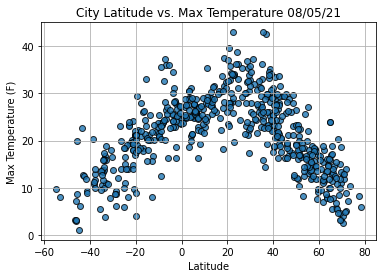

In [99]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

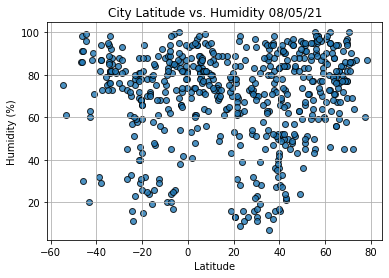

In [100]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

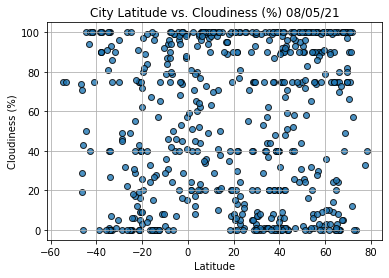

In [103]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

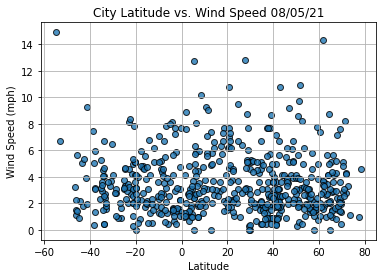

In [104]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [105]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [106]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [107]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [108]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

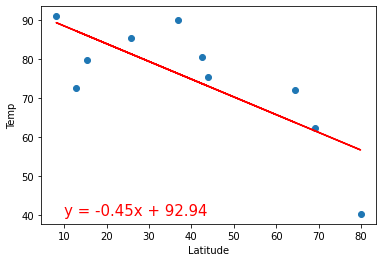

In [109]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

NameError: name 'x_values' is not defined